In [ ]:
a = 2
print(a)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
# price_before: 订单执行前的最优价格, price_after: 订单执行后的最优价格
# depth_before: 执行前的市场深度, depth_after: 执行后的市场深度
# side: 买卖方向 (1 = 买单, -1 = 卖单), quantity: 订单数量
data = pd.DataFrame({
    'price_before': [100, 101, 102, 100, 99],
    'price_after': [101, 102, 102.5, 99.5, 98.5],
    'depth_before': [1000, 1200, 900, 1100, 950],
    'depth_after': [900, 1100, 850, 1000, 850],
    'quantity': [100, 200, 150, 120, 180],
    'side': [1, 1, -1, -1, 1]
})

In [4]:
# 计算瞬时价格冲击和深度冲击
data['price_impact'] = (data['price_after'] - data['price_before']) / data['price_before']
data['depth_impact'] = data['depth_before'] - data['depth_after']

In [10]:
len(data['price_impact'])

5

In [11]:
len(data['depth_impact'])

5

In [7]:
# 特征选择：包括订单数量、买卖方向和市场执行前的深度
features = ['quantity', 'side', 'depth_before']

# 目标值是我们要预测的瞬时冲击
X = data[features]
y_price = data['price_impact']
y_depth = data['depth_impact']

In [8]:
# 分割训练集和测试集
X_train, X_test, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
X_train, X_test, y_depth_train, y_depth_test = train_test_split(X, y_depth, test_size=0.2, random_state=42)

# 使用线性回归模型来预测价格冲击和深度冲击
price_model = LinearRegression()
depth_model = LinearRegression()

# 训练模型
price_model.fit(X_train, y_price_train)
depth_model.fit(X_train, y_depth_train)

# 进行预测
y_price_pred = price_model.predict(X_test)
y_depth_pred = depth_model.predict(X_test)

# 计算均方误差
price_mse = mean_squared_error(y_price_test, y_price_pred)
depth_mse = mean_squared_error(y_depth_test, y_depth_pred)

print(f'Price Impact MSE: {price_mse}')
print(f'Depth Impact MSE: {depth_mse}')

Price Impact MSE: 0.0016998200013746687
Depth Impact MSE: 5243.757431629018


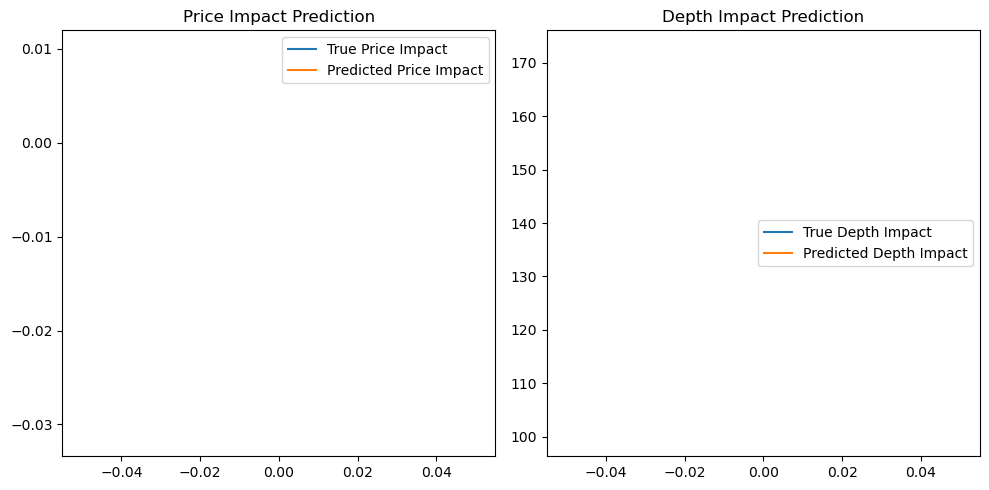

In [9]:
# 结果可视化
plt.figure(figsize=(10, 5))

# 绘制价格冲击预测结果
plt.subplot(1, 2, 1)
plt.plot(y_price_test.values, label='True Price Impact')
plt.plot(y_price_pred, label='Predicted Price Impact')
plt.title('Price Impact Prediction')
plt.legend()

# 绘制深度冲击预测结果
plt.subplot(1, 2, 2)
plt.plot(y_depth_test.values, label='True Depth Impact')
plt.plot(y_depth_pred, label='Predicted Depth Impact')
plt.title('Depth Impact Prediction')
plt.legend()

plt.tight_layout()
plt.show()